<a href="https://colab.research.google.com/github/Shyamsai456/MLProjects/blob/main/Final_Project_League_of_Legends_Match_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Project: League of Legends Match Predictor


### Introduction

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.

### Step 1: Data Loading and Preprocessing




### Setup
Installing required libraries:




In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch


filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv"
df = pd.read_csv(filepath)
df.head()

X= df.drop('win', axis=1)
y =df['win']

print(X.shape)
print(y.shape)

X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
Y_test = torch.tensor(Y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)



(1000, 8)
(1000,)


### Step 2: Logistic Regression Model



Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.




In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_units=8, hidden_layers=64, output_units=1):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_units, hidden_layers)
        self.linear2 = nn.Linear(hidden_layers, output_units)

    def forward(self,x):
        x = torch.relu(self.linear(x))
        x = self.linear2(x)
        x = torch.sigmoid(x)
        return x


input_dim = X_train.shape[1]  # Get number of features
model = LogisticRegressionModel(input_units=input_dim, hidden_layers=8, output_units=1)  # Instantiate model

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

# Create PyTorch datasets and DataLoaders
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(model)


LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=1, bias=True)
)


### Step 3: Model Training



The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.



In [ ]:
epochs = 100
train_losses = []
test_losses = []

threshold = 0.5  # Define threshold for classification

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Reset gradients
        y_pred = model(X_batch)  # Forward pass
        loss = criterion(y_pred, y_batch)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        total_loss += loss.item()

    # Compute average training loss for the epoch
    train_loss = total_loss / len(train_loader)
    train_losses.append(train_loss)

    # Set model to evaluation mode
    model.eval()
    test_loss = 0.0
    with torch.no_grad():  # No gradient calculation during evaluation
        correct_train = 0
        correct_test = 0
        total_train = 0
        total_test = 0

        # Evaluate on training set
        for X_batch, y_batch in train_loader:
            train_outputs = model(X_batch)
            # Apply threshold to get predictions (0 or 1)
            train_preds = (train_outputs.squeeze() > threshold).float()
            correct_train += (train_preds == y_batch).sum().item()
            total_train += y_batch.size(0)
            # Calculate loss for training set
            loss = criterion(train_outputs, y_batch)
            test_loss += loss.item()

        # Evaluate on test set
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            # Apply threshold to get predictions (0 or 1)
            test_preds = (test_outputs.squeeze() > threshold).float()
            correct_test += (test_preds == y_batch).sum().item()
            total_test += y_batch.size(0)
            # Calculate loss for test set
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    # Compute average test loss for the epoch
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    # Calculate accuracy for training and test set
    train_accuracy = correct_train / total_train
    test_accuracy = correct_test / total_test

    # Print loss and accuracy after each epoch
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch 1/100, Train Loss: 0.6909, Train Accuracy: 16.06%, Test Loss: 3.1629, Test Accuracy: 15.57%
Epoch 2/100, Train Loss: 0.6909, Train Accuracy: 16.43%, Test Loss: 3.1628, Test Accuracy: 15.57%
Epoch 3/100, Train Loss: 0.6908, Train Accuracy: 16.03%, Test Loss: 3.1627, Test Accuracy: 15.57%
Epoch 4/100, Train Loss: 0.6908, Train Accuracy: 16.18%, Test Loss: 3.1626, Test Accuracy: 15.57%
Epoch 5/100, Train Loss: 0.6908, Train Accuracy: 16.20%, Test Loss: 3.1624, Test Accuracy: 15.55%
Epoch 6/100, Train Loss: 0.6907, Train Accuracy: 15.99%, Test Loss: 3.1623, Test Accuracy: 15.55%
Epoch 7/100, Train Loss: 0.6907, Train Accuracy: 16.05%, Test Loss: 3.1622, Test Accuracy: 15.55%
Epoch 8/100, Train Loss: 0.6907, Train Accuracy: 16.27%, Test Loss: 3.1621, Test Accuracy: 15.52%
Epoch 9/100, Train Loss: 0.6907, Train Accuracy: 16.15%, Test Loss: 3.1620, Test Accuracy: 15.52%
Epoch 10/100, Train Loss: 0.6907, Train Accuracy: 16.06%, Test Loss: 3.1618, Test Accuracy: 15.52%
Epoch 11/100, Train

### Step 4: Model Optimization and Evaluation



Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.



In [ ]:
## Write your code here
# Step 1: Modify the optimizer to include L2 regularization (weight_decay)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)  # Added weight_decay for L2 regularization

# Step 2: Train the Model with L2 Regularization
epochs = 1000
train_losses = []
test_losses = []
train_correct = 0
test_correct = 0
total_train = 0
total_test = 0

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Reset gradients
        y_pred = model(X_batch)  # Forward pass
        loss = criterion(y_pred, y_batch)  # Compute loss with squeeze to match target shape
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        total_loss += loss.item()

    train_loss = total_loss / len(train_loader)
    train_losses.append(train_loss)

    # Step 3: Evaluate the Model's Performance on Training Data
    model.eval()
    total_train = 0
    train_correct = 0
    with torch.no_grad():
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            predicted = (torch.sigmoid(y_pred) >= 0.5).float()  # Apply threshold of 0.5
            train_correct += (predicted == y_batch).sum().item()
            total_train += y_batch.size(0)

    train_accuracy = train_correct / total_train
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Step 4: Evaluate the Model on Test Data
    test_loss = 0.0
    test_correct = 0
    total_test = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            test_loss += loss.item()

            predicted = (torch.sigmoid(y_pred) >= 0.5).float()  # Apply threshold of 0.5
            test_correct += (predicted == y_batch).sum().item()
            total_test += y_batch.size(0)

    test_loss /= len(test_loader)
    test_accuracy = test_correct / total_test
    test_losses.append(test_loss)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Step 5: Final Evaluation After All Epochs
print(f"\nFinal Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")


Epoch 1/1000, Training Loss: 0.6875, Training Accuracy: 0.5100
Epoch 2/1000, Training Loss: 0.6875, Training Accuracy: 0.5100
Epoch 3/1000, Training Loss: 0.6875, Training Accuracy: 0.5100
Epoch 4/1000, Training Loss: 0.6875, Training Accuracy: 0.5100
Epoch 5/1000, Training Loss: 0.6874, Training Accuracy: 0.5100
Epoch 6/1000, Training Loss: 0.6874, Training Accuracy: 0.5100
Epoch 7/1000, Training Loss: 0.6874, Training Accuracy: 0.5100
Epoch 8/1000, Training Loss: 0.6874, Training Accuracy: 0.5100
Epoch 9/1000, Training Loss: 0.6874, Training Accuracy: 0.5100
Epoch 10/1000, Training Loss: 0.6873, Training Accuracy: 0.5100
Epoch 11/1000, Training Loss: 0.6873, Training Accuracy: 0.5100
Epoch 12/1000, Training Loss: 0.6873, Training Accuracy: 0.5100
Epoch 13/1000, Training Loss: 0.6873, Training Accuracy: 0.5100
Epoch 14/1000, Training Loss: 0.6873, Training Accuracy: 0.5100
Epoch 15/1000, Training Loss: 0.6873, Training Accuracy: 0.5100
Epoch 16/1000, Training Loss: 0.6873, Training Ac

### Step 5: Visualization and Interpretation

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error.

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC:
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.



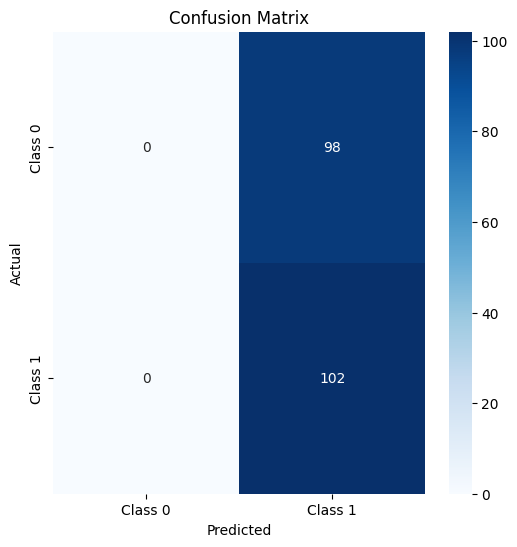

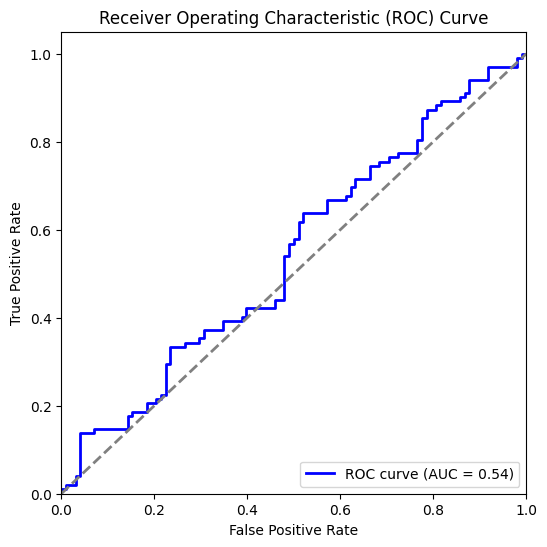


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        98
     Class 1       0.51      1.00      0.68       102

    accuracy                           0.51       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200



/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
## Write your code here
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Step 1: Evaluate the model and get predictions
model.eval()
y_true = []
y_pred_prob = []
y_pred_class = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_true.extend(y_batch.numpy())
        y_pred = model(X_batch)

        # Collecting predicted probabilities for ROC curve
        y_pred_prob.extend(torch.sigmoid(y_pred).numpy())

        # Convert predictions to class 0 or 1 based on 0.5 threshold
        y_pred_class.extend((torch.sigmoid(y_pred) >= 0.5).float().numpy())

# Convert to numpy arrays for easier handling
y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred_class = np.array(y_pred_class)

# Step 2: Confusion Matrix
cm = confusion_matrix(y_true, y_pred_class)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 3: ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 4: Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_class, target_names=['Class 0', 'Class 1']))




### Step 6: Model Saving and Loading





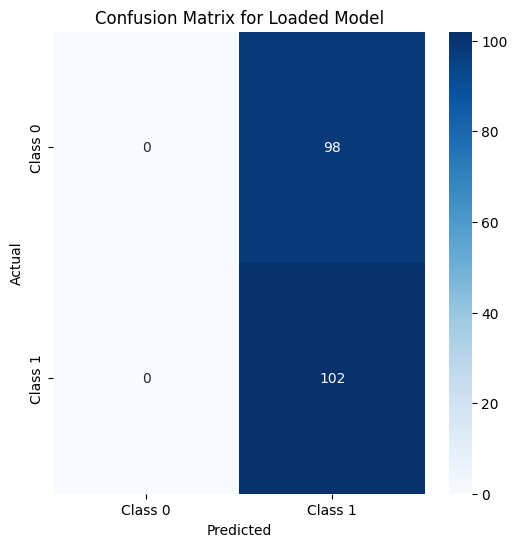

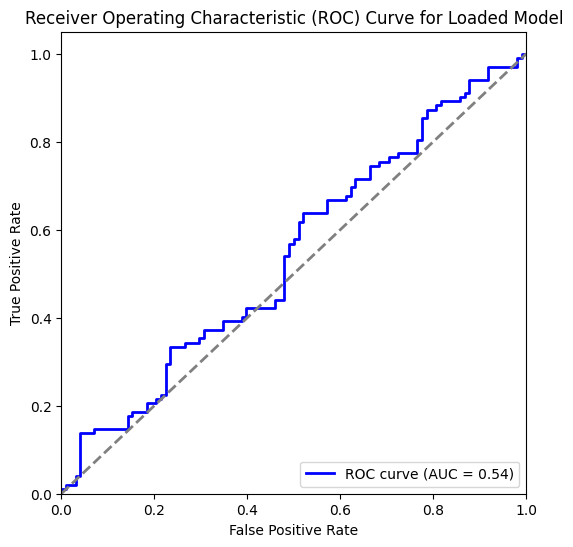


Classification Report for Loaded Model:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        98
     Class 1       0.51      1.00      0.68       102

    accuracy                           0.51       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200



/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
## Write your code here
# Save the model
torch.save(model.state_dict(),'my_model.pth')

# Load the model
loaded_model = LogisticRegressionModel(input_units=X_train.shape[1], hidden_layers=8, output_units=1)
loaded_model.load_state_dict(torch.load('my_model.pth'))

# Ensure the loaded model is in evaluation mode

loaded_model.eval()

# Evaluate the loaded model

# Create lists to store predictions and true labels
y_true = []
y_pred_prob = []
y_pred_class = []

# Ensure no gradients are calculated during evaluation
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_true.extend(y_batch.numpy())
        y_pred = loaded_model(X_batch)

        # Collecting predicted probabilities for ROC curve
        y_pred_prob.extend(torch.sigmoid(y_pred).numpy())

        # Convert predictions to class 0 or 1 based on 0.5 threshold
        y_pred_class.extend((torch.sigmoid(y_pred) >= 0.5).float().numpy())

# Convert to numpy arrays for easier handling
y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred_class = np.array(y_pred_class)

# Step 4: Confusion Matrix
cm = confusion_matrix(y_true, y_pred_class)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Loaded Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 5: ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Loaded Model')
plt.legend(loc='lower right')
plt.show()

# Step 6: Classification Report
print("\nClassification Report for Loaded Model:")
print(classification_report(y_true, y_pred_class, target_names=['Class 0', 'Class 1']))



### Step 7: Hyperparameter Tuning




In [ ]:
## Write your code here
import torch.optim as optim

# Define learning rates to test
learning_rates = [0.01, 0.05, 0.1]

# Store results for comparison
results = {}

# Loop through each learning rate
for lr in learning_rates:
    # Reinitialize the model
    model = LogisticRegressionModel(input_units=X_train.shape[1], hidden_layers=8, output_units=1)

    # Reinitialize the optimizer with the current learning rate and L2 regularization
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)

    # Train the model for a fixed number of epochs (e.g., 50 or 100)
    epochs = 50
    train_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()  # Reset gradients
            y_pred = model(X_batch)  # Forward pass
            loss = criterion(y_pred, y_batch)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            total_loss += loss.item()

        # Calculate the average training loss
        train_loss = total_loss / len(train_loader)
        train_losses.append(train_loss)

        # Evaluate on the test set after each epoch
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                y_pred = model(X_batch)
                y_pred_class = (torch.sigmoid(y_pred) >= 0.5).float()
                correct += (y_pred_class == y_batch).sum().item()
                total += y_batch.size(0)

        # Calculate test accuracy
        test_accuracy = correct / total
        test_accuracies.append(test_accuracy)

    # Store the results for this learning rate
    results[lr] = {
        'final_test_accuracy': test_accuracies[-1],  # Store the final test accuracy
        'train_loss': train_losses[-1]  # Store the final training loss
    }

    # Print progress for each learning rate
    print(f"Learning Rate: {lr}")
    print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
    print(f"Final Training Loss: {train_losses[-1]:.4f}")
    print("-" * 50)

# Compare the results to find the best learning rate
best_lr = max(results, key=lambda k: results[k]['final_test_accuracy'])
print(f"\nBest Learning Rate: {best_lr} with Test Accuracy: {results[best_lr]['final_test_accuracy']:.4f}")



Learning Rate: 0.01
Final Test Accuracy: 0.5100
Final Training Loss: 0.6902
--------------------------------------------------
Learning Rate: 0.05
Final Test Accuracy: 0.5100
Final Training Loss: 0.6874
--------------------------------------------------
Learning Rate: 0.1
Final Test Accuracy: 0.5100
Final Training Loss: 0.6871
--------------------------------------------------

Best Learning Rate: 0.01 with Test Accuracy: 0.5100


### Step 8: Feature Importance



The code to evaluate feature importance to understand the impact of each feature on the prediction.


Evaluating feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.


In [ ]:
X.shape
weights = model.linear.weight.data.numpy().flatten()
weights.shape

(64,)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Extract the weights of the linear layer
weights = model.linear.weight.data.numpy().flatten()  # Flattening the weights for easier handling

# 2. Create a DataFrame for feature importance
features = X.columns  # Get feature names from the DataFrame `X`
# Ensure that the number of weights matches the number of features
if len(features) == len(weights):
    # 3. Create a DataFrame for feature importance
    feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})

    # 4. Sort by the absolute importance values (magnitude of the weights)
    feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
    feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

    # 5. Print the sorted feature importance
    print(feature_importance[['Feature', 'Importance']])

    # 6. Plot feature importance using a horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Based on Model Weights')
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Ensure everything fits without overlap
    plt.show()

else:
    print("The number of features in X does not match the number of weights in the model.")

The number of features in X does not match the number of weights in the model.
